In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [13]:
df = pd.read_csv('track_data.csv', index_col=0)

df.drop_duplicates(subset=['Track IDs'], keep='first', inplace=True)

df.head()

,Artists,Moods,Names,Preview URLs,Track IDs,Instrumentalness,Modality,Speechiness,Energy,Tempo,Valence,Loudness
0,Lauv,sad,"fuck, i'm lonely (with Anne-Marie) - from “13 ...",https://p.scdn.co/mp3-preview/f516b7ef3c83e390...,322tcqPhma7F6hfCeLisx0,0.000000,1,0.0683,0.558,95.016,0.678,-6.460
1,Sabrina Carpenter,sad,In My Bed,NaN,2o0KMNhcw5KO7CuslvR4Xs,0.002290,0,0.0950,0.385,109.046,0.666,-6.024
2,Bea Miller,sad,feel something,https://p.scdn.co/mp3-preview/82b929ed0adcbb9a...,7JDWhC422Gtk1Bq0mL3OTC,0.000156,1,0.0707,0.415,136.029,0.156,-8.914
3,Carly Rae Jepsen,sad,Favourite Colour,https://p.scdn.co/mp3-preview/1ff4b4b52fe3f888...,17mS1Cr70SD2PTOTnqL3LT,0.000005,1,0.0519,0.658,146.007,0.677,-5.386
4,MUNA,sad,Who,https://p.scdn.co/mp3-preview/d83fd740dfcd06d9...,0qTBo7ExHHGI7RLCk3CwDS,0.000272,0,0.0514,0.667,150.093,0.219,-5.770


In [14]:
X = df.iloc[:, 5:].values
y = df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
error = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

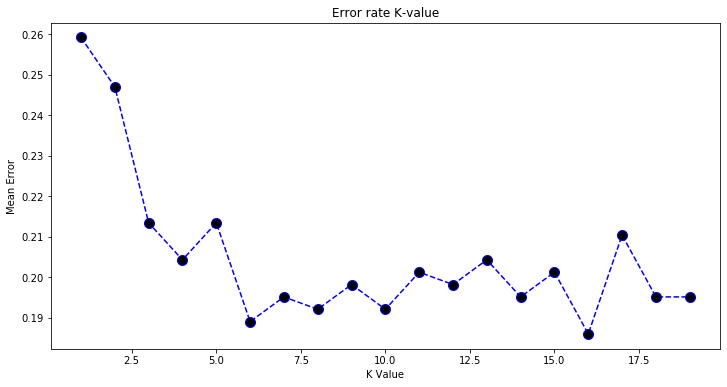

In [17]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20), error, color='blue', marker='o', markerfacecolor='black', markersize=10, linestyle='dashed');
plt.title('Error rate K-value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [18]:
knn = KNeighborsClassifier(n_neighbors=np.argmin(error))
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [19]:
y_pred = knn.predict(X_test)

In [20]:
knn_confusion = confusion_matrix(y_test, y_pred)

print(knn_confusion)
print(classification_report(y_test, y_pred))

[[164  23]
 [ 43  98]]
              precision    recall  f1-score   support

       happy       0.79      0.88      0.83       187
         sad       0.81      0.70      0.75       141

    accuracy                           0.80       328
   macro avg       0.80      0.79      0.79       328
weighted avg       0.80      0.80      0.80       328



High precision means that if the model predicts a "positive value" (ie. it predicted a song was happy), it is very likely that the prediction is correct. High recall, on the other hand, means that the model does a really good job at predicting all of the cases correctly (ie. the model currently does a good job at catching all of the happy songs and predicting them properly.)

In [21]:
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))

The score for kNN is
Training:  80.89%
Test set:  79.88%


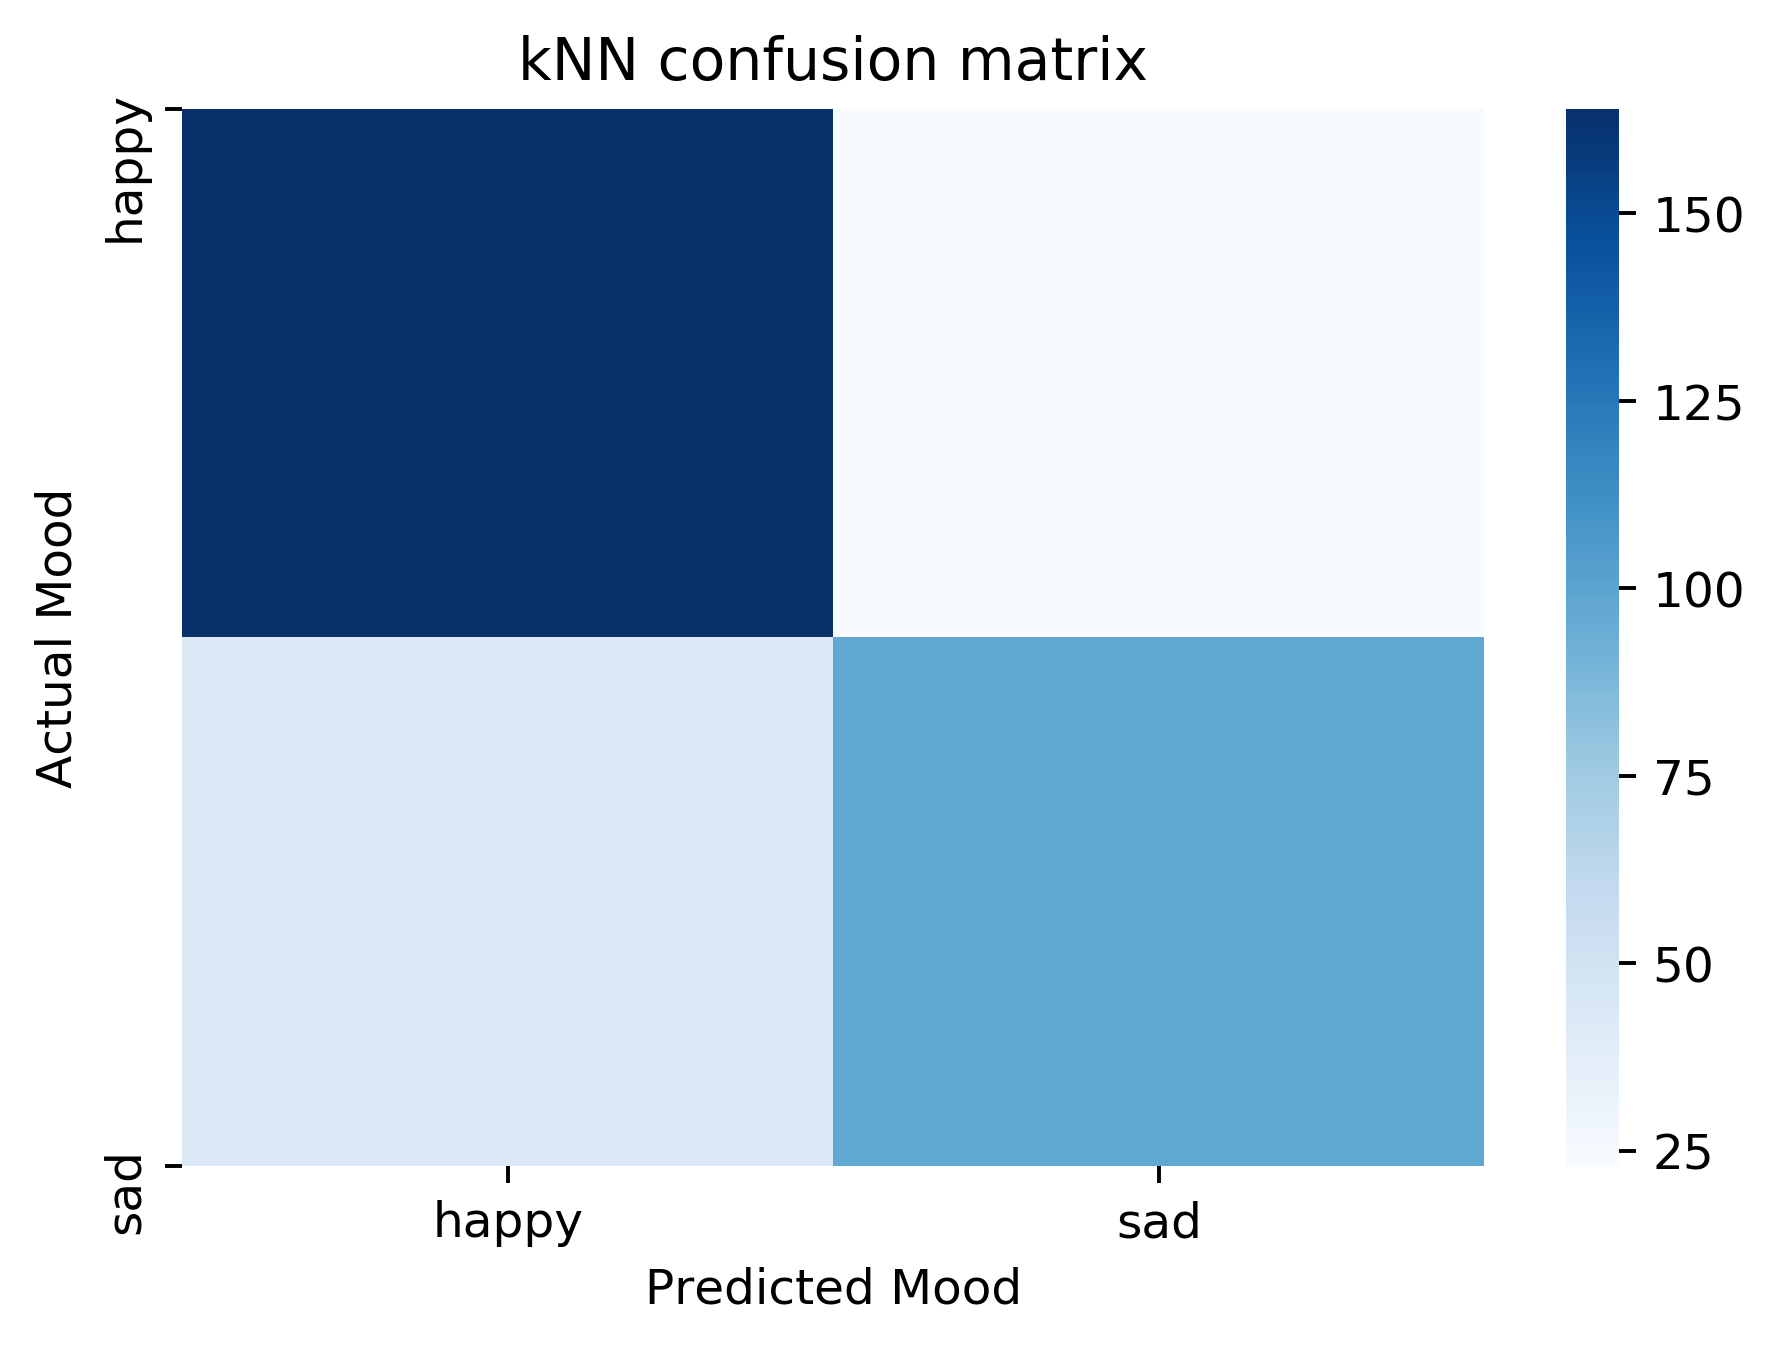

In [23]:
plt.figure(dpi=350)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues,
           xticklabels=['happy', 'sad'],
           yticklabels=['happy', 'sad'])

plt.xlabel('Predicted Mood')
plt.ylabel('Actual Mood')
plt.title('kNN confusion matrix');
plt.savefig('KNN.png')